In [48]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [49]:
#load dataset
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [50]:
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [51]:
# Split the dataframe into data and target
X = df.drop(["MYOPIC"], axis=1)
y = df["MYOPIC"]

In [52]:
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [53]:
#Standardize the dataset
myopia_scaled = StandardScaler().fit_transform(df)

In [59]:
# Applying PCA to reduce dimensions to 9
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [60]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.19869153, 0.14662762, 0.09951898, 0.07902771, 0.0710028 ,
       0.06555091, 0.06171931, 0.05989506, 0.05316865, 0.04913464,
       0.04465087])

In [61]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9289880687733464

In [62]:
# Get the shape of features after reduction
myopia_pca.shape

(618, 11)

In [91]:
# Run t-SNE
tsne = TSNE(learning_rate=25)
tsne_features = tsne.fit_transform(myopia_pca)

C:\Users\tammy\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [92]:
# Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

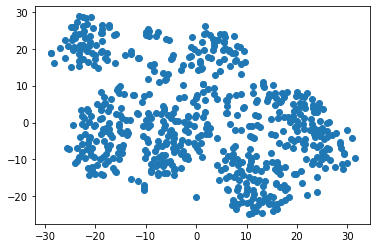

In [93]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [94]:
# Loop through data to create a list of inertias for each k from 1 to 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\tammy\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,8611.719398
1,2,7453.292155
2,3,6686.361671
3,4,6206.151491
4,5,5888.248458


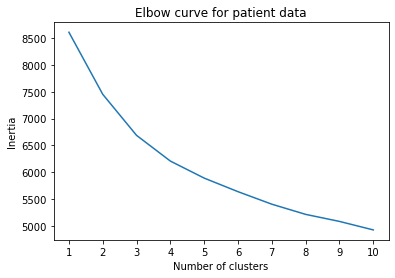

In [95]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for patient data')
plt.show()

*Patients can be clustered into groups of 3.  The elbow curve shows the curve begin to flatten out at the 3 to 4 number of clusters.*